<h1 style="text-align:center;margin:50px 0">Support Vector Machines (SVM)</h1>
<h2 style="text-align:center;margin:30px 0;color:blue">Iris Dataset</h2>

### Import required modules

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Split the dataset into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialize the SVM classifier

In [16]:
svm = SVC()

### Fit the model to the training data

In [17]:
svm.fit(X_train, y_train)

SVC()

### Hyperparameters tuning

In [18]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

### Use the best model to make predictions

In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

### Evaluate the model

In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


### Plot the confusion matrix

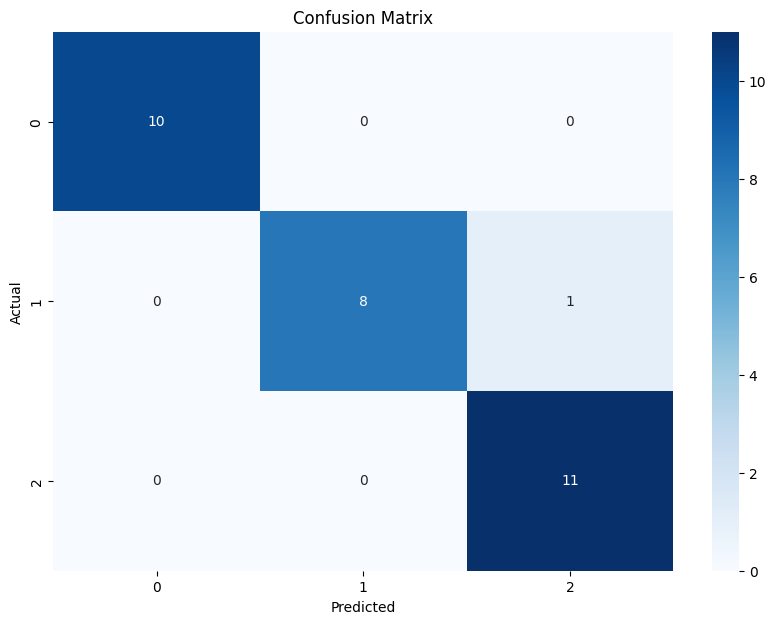

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Perform cross-validation

In [22]:
cross_val_scores = cross_val_score(best_model, X, y, cv=10)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

Cross-validation scores: [1.         1.         1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
Mean cross-validation score: 0.9800000000000001


<hr style="border:1px solid black;margin:35px 0px">

<div style="text-align:center;color:purple;padding:50px 0px;background-color:pink"><h2>Now I show you an example to learn to visualizing <u>The Decision Boundaries.</u></h2></div>

### Load dataset

In [69]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take only the first two features for 2D visualization
y = iris.target

### Split the dataset into training and testing sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialize the SVM classifier

In [72]:
svm = SVC(kernel='linear')  # Linear kernel for simplicity in visualization

### Fit the model to the training data

In [73]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

### A method to visualize **The Decision Boundaries**

In [74]:
def plot_decision_boundaries(X, y, model, ax, title='Decision Boundaries'):
    # Define the mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the decision boundary for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('sepal width (cm)')

### Call the method to plot the results

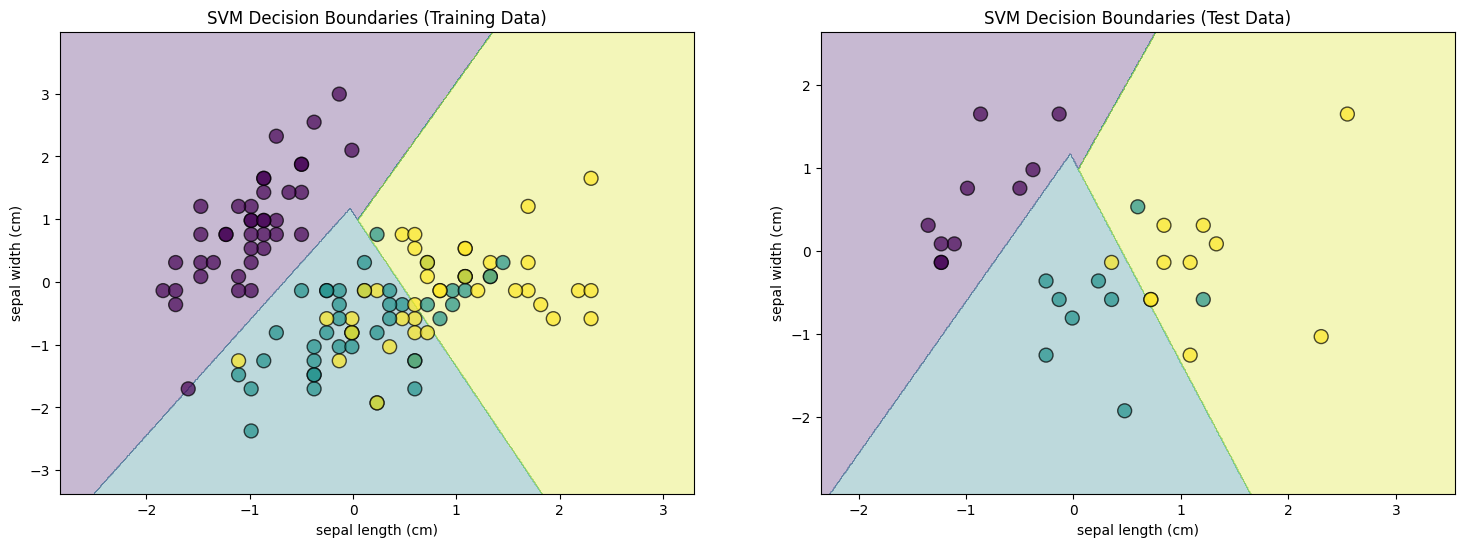

In [75]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Visualize the decision boundaries on the training data
plot_decision_boundaries(X_train, y_train, svm, axes[0], title='SVM Decision Boundaries (Training Data)')

# Visualize the decision boundaries on the test data
plot_decision_boundaries(X_test, y_test, svm, axes[1], title='SVM Decision Boundaries (Test Data)')

# Show the plot
plt.show()